# Exploratory data analytic

In this notebook I am trying to analysis the seattle Airbnb dataset and figure out the answer for below three business questions that I have put forward
 - Which part of the year airbnbs are cheaper in Seattle ?
 - Does the Airbnb listing goes down during the cheaper months ?
 - Do visitors tend to review less during cheaper months ?

# Load needed libraries

In [6]:
import pandas as pd
from matplotlib import pyplot as plt

# Gather data

In [7]:
def load_data():
    '''
    Input:
          None
    Output:
         Returns three dataframe for listing , calendar and review datasets
    '''
    df_list=pd.read_csv(r'C:\Users\JP\Downloads\Learning\Udacity\Proc\archive\listings.csv')
    df_cal=pd.read_csv(r'C:\Users\JP\Downloads\Learning\Udacity\Proc\archive\calendar.csv')
    df_rvw=pd.read_csv(r'C:\Users\JP\Downloads\Learning\Udacity\Proc\archive\reviews.csv')
    return df_list,df_cal,df_rvw

In [8]:
# Load the dataset into panda dataframe
df_list,df_cal,df_rvw =load_data()

# Check for features with missing data

In [4]:
# List columns that has more than 50 % null values 
list_null_feat = list(  df_list.columns [ df_list.isnull().sum()/ df_list.shape[0]>0.5 ]  ) 
cal_null_feat = list(  df_cal.columns [ df_cal.isnull().sum()/ df_cal.shape[0]>0.1 ]  ) 
rvw_null_feat = list(  df_rvw.columns [ df_rvw.isnull().sum()/ df_rvw.shape[0]>0.1 ]  ) 

print(list_null_feat )
print(cal_null_feat )
print(rvw_null_feat )


['square_feet', 'monthly_price', 'security_deposit', 'license']
['price']
[]


# Cleaning the data
 Price is one of the important feature that gone to be used in the analysis but that got more Null values .So . either we have to impute or drop those records .In this case I am deciding to drop Listings with Null price value as we are still left with good volumne of data with valid value    
 

In [12]:
print("No of null records in Price "+ str( df_cal['price'].isnull().sum() ) )
print("No of not null records in Price "+ str( df_cal['price'].notnull().sum() ) )

No of null records in Price 459028
No of not null records in Price 934542


# Drop listings with null price 
   First we are figuring the listing IDs with null price and then droping those listings in all 3 dataset.

In [9]:
# Drop rows with null value in Price
df_cal_trn=df_cal[ ~ df_cal.price.isnull() ] 
# Get unique Listing ID that got valid price value
df_cal_ID=pd.DataFrame( df_cal_trn.listing_id.unique() ,columns=['listing_id']  )

#Drop the listing with null price value in other 2 dataset through join 
df_list_trn=df_list.join(df_cal_ID.set_index(["listing_id"]),on='id',how="inner" ,lsuffix='_left')
df_rvw_trn=df_rvw .join(df_cal_ID.set_index(["listing_id"]),on='listing_id',how="inner" ,lsuffix='_left')
            


# Prepare data 
   In each of the dataset date value is loaded as char data type .So first I am converting those to data data type and then deriving Month and Year feature from that

In [10]:
#Convert date field to date datatyp
df_cal_trn['date'] = pd.to_datetime(df_cal_trn['date'])
df_cal_trn['Month'] = pd.to_datetime(df_cal_trn['date']).dt.month
df_cal_trn['Year'] = pd.to_datetime(df_cal_trn['date']).dt.year

df_rvw_trn['date'] = pd.to_datetime(df_rvw_trn['date'])
df_rvw_trn['Month'] = pd.to_datetime(df_rvw_trn['date']).dt.month
df_rvw_trn['Year'] = pd.to_datetime(df_rvw_trn['date']).dt.year

df_list_trn['last_scraped'] = pd.to_datetime(df_list_trn['last_scraped'])

<ipython-input-10-567df436f0eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cal_trn['date'] = pd.to_datetime(df_cal_trn['date'])
<ipython-input-10-567df436f0eb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cal_trn['Month'] = pd.to_datetime(df_cal_trn['date']).dt.month
<ipython-input-10-567df436f0eb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [11]:
#Remove dollar symbol from price column
df_cal_trn['price']=df_cal_trn['price'].replace('[\$,]', '', regex=True).astype(float)

<ipython-input-11-df57fe0188f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cal_trn['price']=df_cal_trn['price'].replace('[\$,]', '', regex=True).astype(float)


# Plot the distribution of price

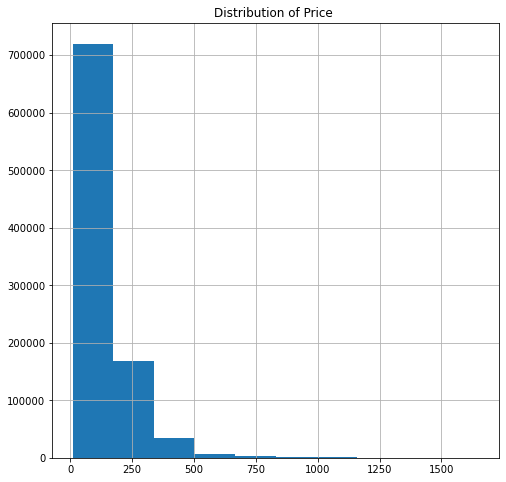

In [12]:
fig,ax = plt.subplots(1,1)
ax.set_title("Distribution of Price ")
#Plot the historgram of Price
df_cal_trn['price'].hist(figsize=(8,8))

 Distribution of price is skewed and most of Airbnbs are falling on the lower price range 

### Question 1: Which part of the year airbnbs are cheaper in Seattle ?
  To figure that out first we will group the dataset at the Year and Month level then calculate the mean of price at that level 

In [13]:
# Group the dataset at month and Year level
df_cal_trn.groupby(['Year','Month']).mean()['price']

Year  Month
2016  1        121.568409
      2        124.293927
      3        128.644488
      4        135.097005
      5        139.538183
      6        147.473137
      7        152.094150
      8        150.656594
      9        143.255949
      10       137.031939
      11       135.688738
      12       137.251835
2017  1        136.882590
Name: price, dtype: float64

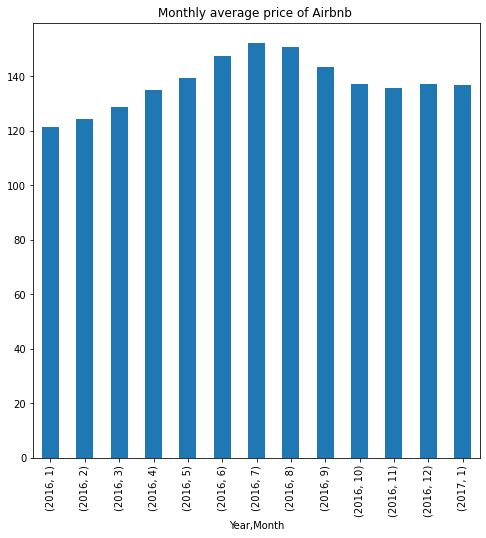

In [14]:
fig,ax = plt.subplots(1,1)
ax.set_title("Monthly average price of Airbnb ")

df_cal_groups=df_cal_trn.groupby(['Year','Month']).mean()['price']

df_cal_groups.plot(kind='bar' , figsize=(8,8))

 From the above plot it is clear that January  ,which is the month after festival season , is the cheapest month

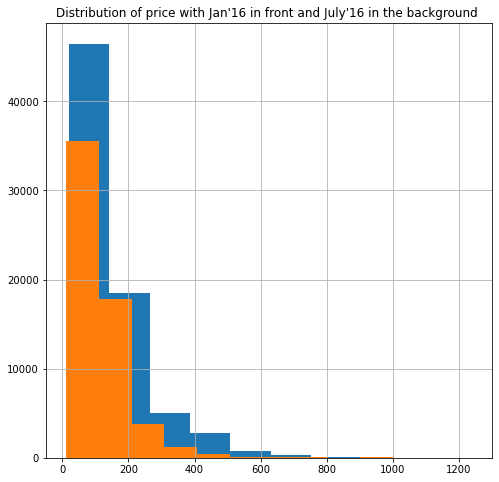

In [15]:
fig,ax = plt.subplots(1,1)
ax.set_title("Distribution of price with Jan'16 in front and July'16 in the background ")
df_cal_trn[(df_cal_trn.Year==2016)&(df_cal_trn.Month==7)]['price'].hist(ax=ax,figsize=(8,8) )
df_cal_trn[(df_cal_trn.Year==2016)&(df_cal_trn.Month==1)]['price'].hist(ax=ax ,figsize=(8,8) )

Here I could see that no of listings also went up in July along with Price

### Question 2: Does the Airbnb listing goes down during the cheaper months ?
  Next I want to know whether the no of listing goes during the cheaper months.To figure that out first I am getting no of listing at month which is also plotted

In [16]:
# Group the dataset at month and Year level
df_cal_trn.groupby(['Year','Month']).count()['listing_id']

Year  Month
2016  1        59239
      2        73321
      3        83938
      4        76037
      5        79971
      6        77244
      7        74222
      8        76347
      9        77246
      10       82438
      11       81780
      12       87061
2017  1         5698
Name: listing_id, dtype: int64

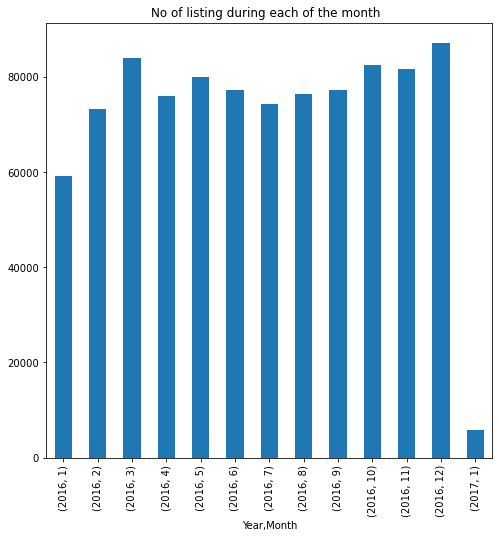

In [17]:
fig,ax = plt.subplots(1,1)
ax.set_title("No of listing during each of the month  ")
df_cal_lst_groups=df_cal_trn.groupby(['Year','Month']).count()['listing_id']

df_cal_lst_groups.plot(kind='bar',figsize=(8,8))

 In the above plot we could see January has comparetively less listing than other months .Compared to January there are more listing during July .No of listing is more during December which make sense

### Question 3: Do visitors tend to review less during cheaper months ?
 For this analysis I have derived the no of reviews at month level .As dataset dont have reviews of 2016 I have plotted based on the data from 2009 to 2015 

In [18]:
# Group the dataset at month and Year level
df_rvw_trn.groupby(['Year','Month']).count()['listing_id']

Year  Month
2009  6           2
      7           1
      8           1
      9           2
      10          6
               ... 
2015  9        6915
      10       5506
      11       3975
      12       3335
2016  1         223
Name: listing_id, Length: 79, dtype: int64

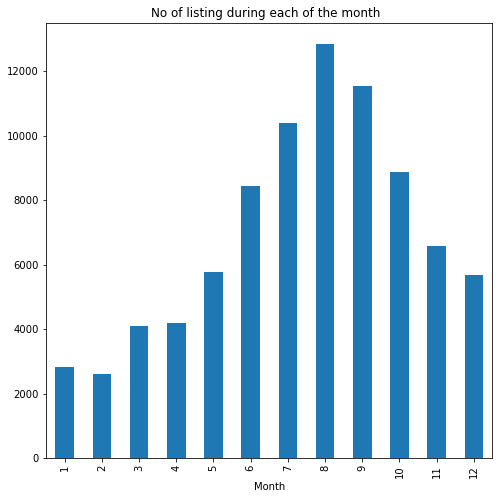

In [20]:
fig,ax = plt.subplots(1,1)
ax.set_title("No of reviews during each of the month from 2009 to 2016  ")
df_rvw_groups=df_rvw_trn.groupby(['Month']).count()['listing_id']

df_rvw_groups.plot(kind='bar',figsize=(8,8))

 Reviewing habits of visitor clearly follow a pattern where it is less in cheaper months and increase when its near the costlier Months .No of reviews reaches peak in August , it may because the visitors of July months are providing the reviews during August after their stay